In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv('advertising-sales.csv')
dataset.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
x = dataset[['tv','radio', 'newspaper']]

In [8]:
y = dataset['sales']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state = 100)

In [12]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [13]:
print("Intercept ", mlr.intercept_)
print("Coefficients: ")
print(list(zip(x, mlr.coef_)))

Intercept  2.5704204903605348
Coefficients: 
[('tv', 0.0456129433539592), ('radio', 0.18790819564489614), ('newspaper', 0.006538109474891502)]


In [14]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.5666586  19.91532669 16.87316142 19.18103127 20.88726447 13.10713912
 11.77420501 12.27979163 20.53574233 20.88631298 10.71381372 19.59315343
  6.39912647 15.16350622  8.93452289  7.8408686  16.12743853 12.02956883
 16.99154034 11.24209542 16.89946856  9.7484549  20.79227655 17.17307004
 15.09416423 21.84737545 19.18593873 10.03210005 19.26453829 14.76806994
 14.28501722  7.4711441   9.98642141 14.73241296  7.15110394 13.51500489
  7.48200416 11.66947614 13.43927619 15.26990574 17.20667701 13.49409231
 14.31093735 13.73069707 11.81193899  8.75560315 12.13737437 19.16095561
  9.06398029  5.09832116 16.20399854 18.09035978 12.91729775 16.7816995
 17.78516384 12.2798573   4.33199098 11.12733589 16.05464021 13.52889194
 17.01241345 17.62386929 20.52388045 14.67660041  9.67779336  6.28872915
 14.52008415]


In [16]:
from sklearn import metrics
import numpy as np

MAE = metrics.mean_absolute_error(y_test, y_pred_mlr)
MSE = metrics.mean_squared_error(y_test, y_pred_mlr)
RMSE = np.sqrt(MSE)

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

R squared: 89.51
MAE: 1.1208858059440139, MSE: 1.9914883669834178, RMSE: 1.4112010370544013


In [17]:
print(y_test[1], y_pred_mlr[1])

10.4 19.915326688110476


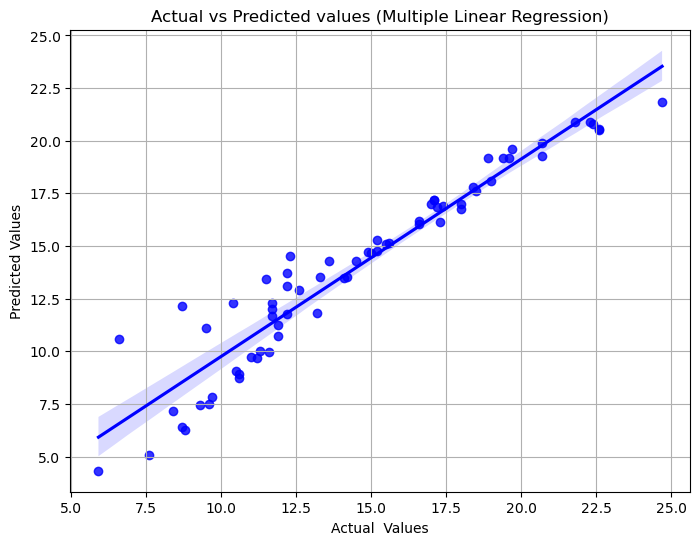

In [19]:
#Plot the Regression Line

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x = y_test, y = y_pred_mlr, color = 'blue')
plt.xlabel('Actual  Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted values (Multiple Linear Regression)")
plt.grid(True)
plt.show()

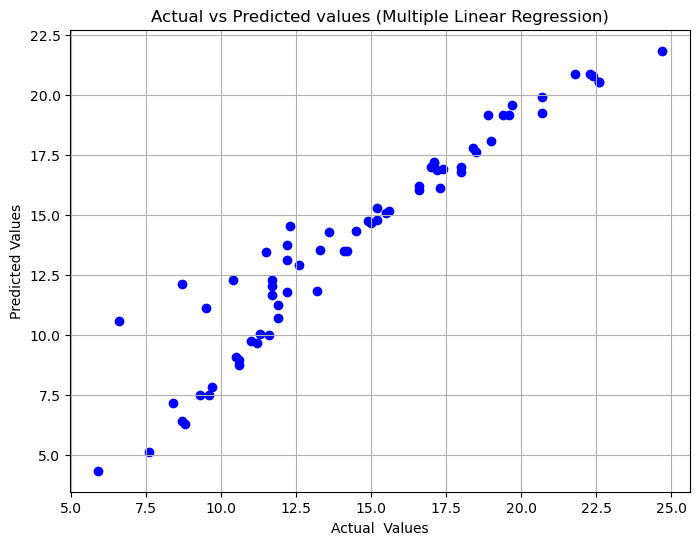

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x = y_test, y = y_pred_mlr, color = 'blue')
plt.xlabel('Actual  Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs Predicted values (Multiple Linear Regression)")
plt.grid(True)
plt.show()

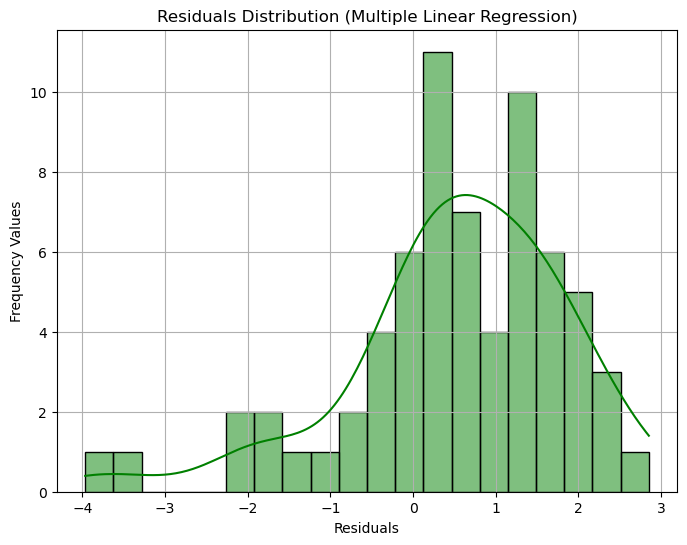

In [22]:
#Plotting residuals
residuals = y_test - y_pred_mlr

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins = 20, kde= True, color = 'green')
plt.xlabel('Residuals')
plt.ylabel('Frequency Values')
plt.title("Residuals Distribution (Multiple Linear Regression)")
plt.grid(True)
plt.show()